In [2]:
# Importamos las bibliotecas necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import pickle
import sklearn

# Cargar el dataset
df = pd.read_csv("Data_limpia_Maternal_Risk_base_de_datos.csv", sep=",")

# Definir las características (X) y la variable objetivo (y)
X = df[['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']]
y = df['RiskLevel']

# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# División del dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Aplicar SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Crear y entrenar el modelo
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_res, y_train_res)

# Predicciones
y_pred = model.predict(X_test)

# Evaluación
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Reporte de Clasificación:\n", classification_report(y_test, y_pred))

# Guardar el modelo
with open('modelo_entrenado_v2.pkl', 'wb') as f:
    pickle.dump(model, f)

# Guardar el scaler (opcional pero recomendado)
with open('scaler_v2.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Mostrar y guardar la versión de scikit-learn
print("Versión de scikit-learn:", sklearn.__version__)
with open('info_version.txt', 'w') as f:
    f.write(f"scikit-learn=={sklearn.__version__}\n")

print("✅ Modelo, scaler y versión guardados correctamente.")

Accuracy: 0.8522167487684729
Reporte de Clasificación:
               precision    recall  f1-score   support

           1       0.88      0.81      0.85        81
           2       0.80      0.82      0.81        67
           3       0.88      0.95      0.91        55

    accuracy                           0.85       203
   macro avg       0.85      0.86      0.86       203
weighted avg       0.85      0.85      0.85       203

Versión de scikit-learn: 1.6.1
✅ Modelo, scaler y versión guardados correctamente.


C:\Users\PC-01\anaconda3\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


C:\Users\PC-01\anaconda3\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


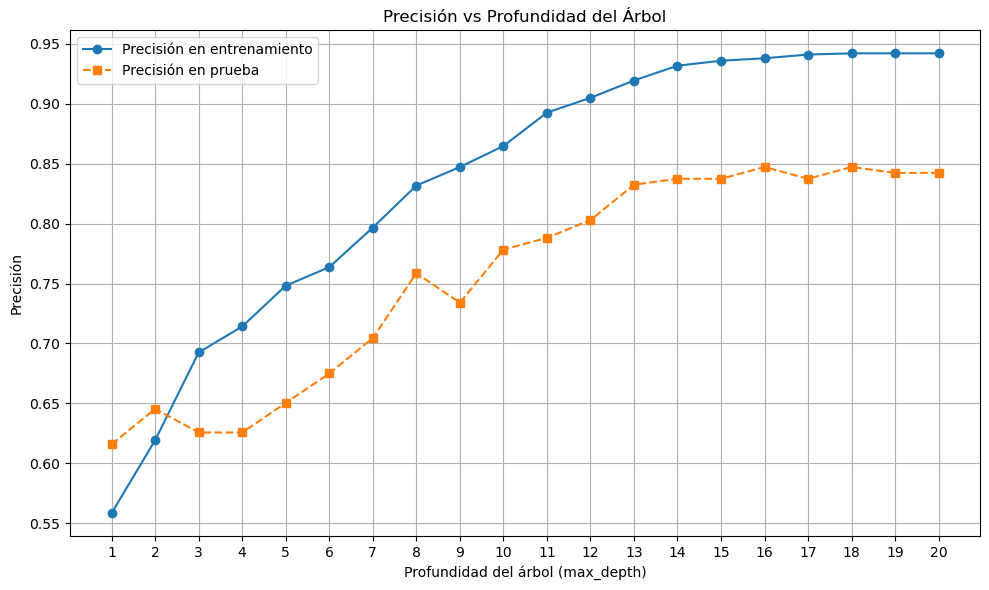

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score

# Cargar los datos
df = pd.read_csv("Data_limpia_Maternal_Risk_base_de_datos.csv")

# Definir X e y
X = df[['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']]
y = df['RiskLevel']

# Escalar características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

# Balancear los datos con SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Evaluar distintos valores de max_depth
depths = range(1, 21)
train_accuracies = []
test_accuracies = []

for d in depths:
    model = DecisionTreeClassifier(max_depth=d, random_state=42)
    model.fit(X_train_res, y_train_res)
    
    # Precisión en train y test
    train_acc = accuracy_score(y_train_res, model.predict(X_train_res))
    test_acc = accuracy_score(y_test, model.predict(X_test))
    
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(depths, train_accuracies, marker='o', label='Precisión en entrenamiento')
plt.plot(depths, test_accuracies, marker='s', label='Precisión en prueba', linestyle='--')
plt.title('Precisión vs Profundidad del Árbol')
plt.xlabel('Profundidad del árbol (max_depth)')
plt.ylabel('Precisión')
plt.xticks(depths)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


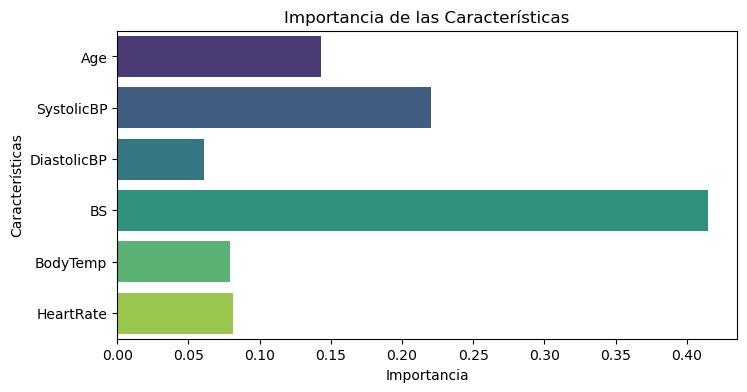

In [3]:
import seaborn as sns

# Obtener importancias
importances = model.feature_importances_
feature_names = X.columns

# Visualizar
plt.figure(figsize=(8, 4))
sns.barplot(x=importances, y=feature_names, palette='viridis')
plt.title("Importancia de las Características")
plt.xlabel("Importancia")
plt.ylabel("Características")
plt.show()


Distribución de clases antes de SMOTE:
RiskLevel
1    323
2    269
3    217
Name: count, dtype: int64

Distribución de clases después de SMOTE:
RiskLevel
1    323
2    323
3    323
Name: count, dtype: int64


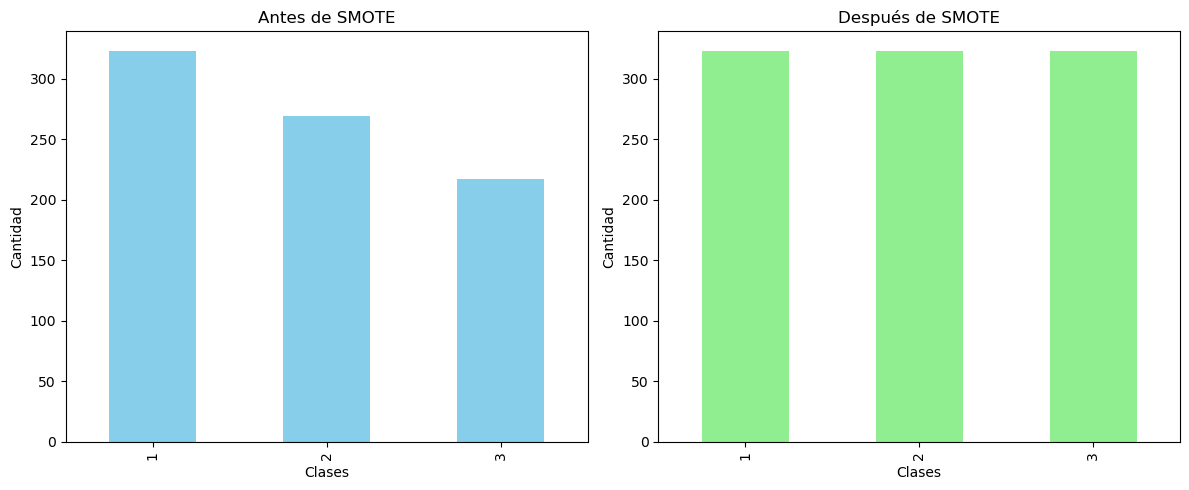

In [4]:
import matplotlib.pyplot as plt

# Distribución de clases antes del balanceo
print("Distribución de clases antes de SMOTE:")
print(y_train.value_counts())

# Distribución de clases después del balanceo
print("\nDistribución de clases después de SMOTE:")
print(pd.Series(y_train_res).value_counts())

# Gráfica de comparación
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Antes
y_train.value_counts().plot(kind='bar', ax=axs[0], color='skyblue', title="Antes de SMOTE")
axs[0].set_xlabel("Clases")
axs[0].set_ylabel("Cantidad")

# Después
pd.Series(y_train_res).value_counts().plot(kind='bar', ax=axs[1], color='lightgreen', title="Después de SMOTE")
axs[1].set_xlabel("Clases")
axs[1].set_ylabel("Cantidad")

plt.tight_layout()
plt.show()
